In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
features = ['citric acid','alcohol','sulphates','volatile acidity']

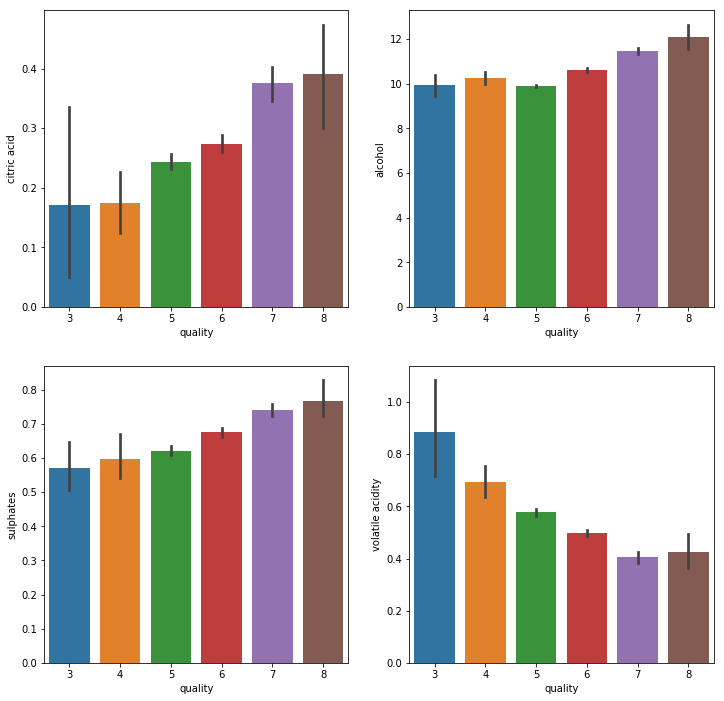

In [8]:
plt.figure(figsize = (12,12))
for i,column in enumerate(x):
    plt.subplot(2,2,i+1)
    sb.barplot(x='quality',y=column,data=data)

In [32]:
bins = (2,6.5,8)
group = ['good','bad']
data['quality']  = pd.cut(data['quality'],bins=bins,labels=group)

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

labels = LabelEncoder()
data['quality'] = labels.fit_transform(data['quality'].astype(str))
data['quality'].value_counts()

1    1381
0     217
2       1
Name: quality, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 

x = data.drop('quality',axis=1)
y = data['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y)
log = LogisticRegression()
log.fit(x_train,y_train)

C:\Users\DELL\AppData\Local\conda\conda\envs\tensorflow-sessions\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\AppData\Local\conda\conda\envs\tensorflow-sessions\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
pred = log.predict(x_test)
log.score(x_test,y_test)

0.8675

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.24      0.36        63
           1       0.87      0.99      0.93       337

   micro avg       0.87      0.87      0.87       400
   macro avg       0.81      0.61      0.64       400
weighted avg       0.85      0.87      0.84       400

